In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #For assigning unique integer value to a catogeries
from sklearn.preprocessing import OneHotEncoder #For creating columns for all 
#the categories and assigning 1 or 0(notation for true/false) value to the column
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import (RandomOverSampler)
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#SMOTE Libraries
from imblearn.over_sampling import SMOTE
#ADASYN Libraries 
from imblearn.over_sampling import ADASYN
#Feature Engineering
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# import sys
# !{sys.executable} -m pip install imblearn --user

In [59]:
data=pd.read_csv(r'C:\Users\nishtha\Desktop\MachineLearning\StartupFile_USA_Final.csv')

In [60]:

data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,1,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,1,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,1,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,1,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,1,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West


In [61]:
data.isnull().sum()

startupName                           0
homepage_url                        235
category_list                         0
total_funding                         0
status                                0
country_code                          0
state_code                            0
funding_rounds                        0
first_funding_at                      0
last_funding_at                       0
homepage_url_code                     0
time_delayFor_first_round             0
average_time_delay_rounds             0
average_raised_usd                    0
average_time_delay_rounds_number      0
time_delayFor_first_round_number      0
statusCode                            0
No_Of_Investors                       0
MainCategory                          0
USA_Region                            0
dtype: int64

In [62]:
data['status'].value_counts()


operating    7495
acquired     1160
closed        521
ipo           447
Name: status, dtype: int64

In [63]:
data['status'].replace({"acquired":"operating", "ipo":"closed"},inplace=True)

In [64]:

data['website_availibility']=data['homepage_url'].notnull().astype('int')

In [65]:
data.head(200)

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,website_availibility
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,...,566 days 00:00:00.000000000,465 days 12:00:00.000000000,5.750250e+05,465,566,1,12,mobile,West,1
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,...,285 days 00:00:00.000000000,307 days 16:00:00.000000000,5.125000e+05,307,285,0,1,e-commerce,South,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,...,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2.000000e+06,328,328,1,6,healthcare,Midwest,1
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,...,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1.600000e+06,189,189,1,2,mobile,West,1
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,...,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1.775000e+06,796,796,1,1,biotech,West,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Addiction Campuses of America,http://addictioncampus.com/,health care,6800000.0,operating,USA,TN,3,5/28/14,5/15/15,...,148 days 00:00:00.000000000,176 days 00:00:00.000000000,3.400000e+06,176,148,1,5,healthcare,South,1
196,AddThis,http://www.addthis.com,advertising|analytics|big data|file sharing|mo...,73000000.0,operating,USA,VA,7,5/1/06,9/1/14,...,276 days 00:00:00.000000000,507 days 12:00:00.000000000,1.216667e+07,507,276,1,16,mobile,South,1
197,Addvocate,http://addvocate.com,enterprise software,2729000.0,operating,USA,CA,2,5/15/13,7/24/13,...,70 days 00:00:00.000000000,70 days 00:00:00.000000000,1.364500e+06,70,70,1,11,software,West,1
198,aDealio,http://www.adealio.com,coupons|e-commerce,1500000.0,operating,USA,TX,2,3/1/11,8/22/11,...,174 days 00:00:00.000000000,174 days 00:00:00.000000000,7.500000e+05,174,174,0,8,e-commerce,South,1


In [66]:
data['status'].unique()

array(['operating', 'closed'], dtype=object)

In [67]:
data.columns

Index(['startupName', 'homepage_url', 'category_list', 'total_funding',
       'status', 'country_code', 'state_code', 'funding_rounds',
       'first_funding_at', 'last_funding_at', 'homepage_url_code',
       'time_delayFor_first_round', 'average_time_delay_rounds',
       'average_raised_usd', 'average_time_delay_rounds_number',
       'time_delayFor_first_round_number', 'statusCode', 'No_Of_Investors',
       'MainCategory', 'USA_Region', 'website_availibility'],
      dtype='object')

In [68]:
data.drop(['startupName','homepage_url','category_list','homepage_url_code',
          'statusCode','time_delayFor_first_round','average_time_delay_rounds'],
          axis=1, inplace=True)
#Axis=1 means columns would be selected while for Axis=0, Rows will be deleted,
#inplace=True for permanent changes

In [69]:
data.head()

,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,website_availibility
0,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,575025.0,465,566,12,mobile,West,1
1,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,512500.0,307,285,1,e-commerce,South,1
2,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,2000000.0,328,328,6,healthcare,Midwest,1
3,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,1600000.0,189,189,2,mobile,West,1
4,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,1775000.0,796,796,1,biotech,West,1


In [70]:
data.drop(['first_funding_at', 'last_funding_at'],
          axis=1, inplace=True)

In [71]:
data.drop(['country_code'],axis=1,inplace=True)

In [72]:
data.head()

,total_funding,status,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,website_availibility
0,1150050.0,operating,CA,3,575025.0,465,566,12,mobile,West,1
1,2050000.0,operating,MD,4,512500.0,307,285,1,e-commerce,South,1
2,4000000.0,operating,WI,2,2000000.0,328,328,6,healthcare,Midwest,1
3,1600000.0,operating,CA,2,1600000.0,189,189,2,mobile,West,1
4,3550000.0,operating,CA,2,1775000.0,796,796,1,biotech,West,1


In [73]:
labelencoder=LabelEncoder()

In [74]:
data['status']=labelencoder.fit_transform(data['status'])

In [75]:
data.head()

,total_funding,status,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,website_availibility
0,1150050.0,1,CA,3,575025.0,465,566,12,mobile,West,1
1,2050000.0,1,MD,4,512500.0,307,285,1,e-commerce,South,1
2,4000000.0,1,WI,2,2000000.0,328,328,6,healthcare,Midwest,1
3,1600000.0,1,CA,2,1600000.0,189,189,2,mobile,West,1
4,3550000.0,1,CA,2,1775000.0,796,796,1,biotech,West,1


In [76]:
data['status'].value_counts()

1    8655
0     968
Name: status, dtype: int64

In [77]:
data['MainCategory'].value_counts()

software         3050
mobile           1514
biotech          1454
healthcare       1282
e-commerce        657
games             483
technology        447
pharma            302
manufacturing     229
medicalGear       205
Name: MainCategory, dtype: int64

In [78]:
data['state_code'].unique()

array(['CA', 'MD', 'WI', 'RI', 'MA', 'NY', 'DC', 'IN', 'OH', 'IL', 'WA',
       'GA', 'MI', 'FL', 'MN', 'SC', 'CT', 'KY', 'VA', 'PA', 'NC', 'TX',
       'CO', 'KS', 'TN', 'AZ', 'OK', 'NJ', 'OR', 'MO', 'AR', 'UT', 'NH',
       'LA', 'NM', 'SD', 'MT', 'NE', 'NV', 'blank', 'DE', 'ID', 'IA',
       'VT', 'MS', 'AK', 'AL', 'HI', 'ND', 'ME', 'WY', 'WV'], dtype=object)

In [79]:
data['state_code']=labelencoder.fit_transform(data['state_code'])

In [80]:
data.head()

,total_funding,status,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,website_availibility
0,1150050.0,1,4,3,575025.0,465,566,12,mobile,West,1
1,2050000.0,1,20,4,512500.0,307,285,1,e-commerce,South,1
2,4000000.0,1,48,2,2000000.0,328,328,6,healthcare,Midwest,1
3,1600000.0,1,4,2,1600000.0,189,189,2,mobile,West,1
4,3550000.0,1,4,2,1775000.0,796,796,1,biotech,West,1


In [81]:
onehot=OneHotEncoder(handle_unknown='ignore')

In [82]:
data=pd.get_dummies(data,columns=['MainCategory','USA_Region'])

In [83]:
data.head()

,total_funding,status,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,website_availibility,MainCategory_biotech,...,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Midwest,USA_Region_Northeast,USA_Region_South,USA_Region_West
0,1150050.0,1,4,3,575025.0,465,566,12,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2050000.0,1,20,4,512500.0,307,285,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4000000.0,1,48,2,2000000.0,328,328,6,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1600000.0,1,4,2,1600000.0,189,189,2,1,0,...,0,0,1,0,0,0,0,0,0,1
4,3550000.0,1,4,2,1775000.0,796,796,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [84]:
data['status'].value_counts()

1    8655
0     968
Name: status, dtype: int64

In [85]:
X=data.iloc[:,np.r_[0,2:23]]

In [86]:
Y=data.iloc[:,1]

In [87]:
x_train, x_test_val,y_train, y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
#random data is normalized data and mean is always 0
#At this stage data is randomly split/sampled into training and testing data

In [88]:
x_train.shape

(7217, 22)

In [89]:
x_test_val.shape

(2406, 22)

In [90]:
y_train.shape

(7217,)

In [91]:
y_train

7232    1
3568    1
2284    0
3774    1
2463    1
       ..
2895    0
7813    1
905     1
5192    1
235     0
Name: status, Length: 7217, dtype: int32

In [92]:
y_test.shape

(2406,)

In [93]:
x_train

,total_funding,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,website_availibility,MainCategory_biotech,MainCategory_e-commerce,...,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Midwest,USA_Region_Northeast,USA_Region_South,USA_Region_West
7232,3100000.0,33,2,1.550000e+06,888,888,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3568,1125000.0,4,3,3.750000e+05,273,463,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2284,7500000.0,4,2,3.750000e+06,245,245,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3774,2000000.0,4,3,2.000000e+06,423,212,11,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2463,6100000.0,19,2,1.770750e+06,357,132,17,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,13790001.0,4,3,4.596667e+06,1266,1104,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7813,9500000.0,7,3,3.166667e+06,403,434,13,1,0,0,...,0,0,0,0,1,0,0,0,1,0
905,25400000.0,4,3,8.466667e+06,425,521,7,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5192,11021503.0,43,3,3.673834e+06,158,220,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
y_train_df=pd.DataFrame(y_train)

In [95]:
y_train_df['status'].value_counts()

1    6493
0     724
Name: status, dtype: int64

In [96]:
y_train_df

,status
7232,1
3568,1
2284,0
3774,1
2463,1
...,...
2895,0
7813,1
905,1
5192,1


In [97]:
sampler=RandomOverSampler(random_state=0)

In [98]:
x_rs, y_rs=sampler.fit_sample(x_train,y_train)

In [99]:
y_rs_df=pd.DataFrame(y_rs)

In [100]:
y_rs_df['status'].value_counts()

1    6493
0    6493
Name: status, dtype: int64

In [101]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [102]:
clf.fit(x_rs,y_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [103]:
y_pred=clf.predict(x_test_val)


In [104]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))

Predicted Observations    0     1
Actual Observations              
0                       135   109
1                       763  1399


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.55      0.24       244
           1       0.93      0.65      0.76      2162

    accuracy                           0.64      2406
   macro avg       0.54      0.60      0.50      2406
weighted avg       0.85      0.64      0.71      2406



In [106]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6375727348295926


In [108]:
#RandomForest using RandomOversampling

random_forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
#n_estimators to define number of trees
#random_state to avoid variance in the results

In [109]:
random_forest.fit(x_rs,y_rs)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [110]:
y_pred=random_forest.predict(x_test_val)

In [111]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations   0     1
Actual Observations             
0                       42   202
1                       98  2064
              precision    recall  f1-score   support

           0       0.30      0.17      0.22       244
           1       0.91      0.95      0.93      2162

    accuracy                           0.88      2406
   macro avg       0.61      0.56      0.58      2406
weighted avg       0.85      0.88      0.86      2406

Accuracy: 0.8753117206982544


In [112]:
#Gradient Boosting
model=GradientBoostingClassifier()

In [113]:
model.fit(x_rs,y_rs)

GradientBoostingClassifier()

In [114]:

y_pred=model.predict(x_test_val)

In [115]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations    0     1
Actual Observations              
0                       118   126
1                       535  1627
              precision    recall  f1-score   support

           0       0.18      0.48      0.26       244
           1       0.93      0.75      0.83      2162

    accuracy                           0.73      2406
   macro avg       0.55      0.62      0.55      2406
weighted avg       0.85      0.73      0.77      2406

Accuracy: 0.7252701579384871


In [116]:
#Synthetic Minority Over Sampling Technique(SMOT)
sampler=SMOTE(random_state=0)
x_rs,y_rs=sampler.fit_sample(x_train,y_train)


In [117]:
y_rs_df=pd.DataFrame(y_rs)

In [118]:
y_rs_df['status'].value_counts()

1    6493
0    6493
Name: status, dtype: int64

In [119]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=7)

In [120]:
dtc.fit(x_rs,y_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [121]:
y_pred=dtc.predict(x_test_val)

In [122]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations    0     1
Actual Observations              
0                        73   171
1                       342  1820
              precision    recall  f1-score   support

           0       0.18      0.30      0.22       244
           1       0.91      0.84      0.88      2162

    accuracy                           0.79      2406
   macro avg       0.55      0.57      0.55      2406
weighted avg       0.84      0.79      0.81      2406

Accuracy: 0.786783042394015


In [123]:
#RandomForest using SMOTE
random=RandomForestClassifier(criterion='entropy',
                              n_estimators=10,random_state=43)

In [124]:
random.fit(x_rs,y_rs)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=43)

In [125]:
y_pred=random.predict(x_test_val)

In [126]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations    0     1
Actual Observations              
0                        41   203
1                       136  2026
              precision    recall  f1-score   support

           0       0.23      0.17      0.19       244
           1       0.91      0.94      0.92      2162

    accuracy                           0.86      2406
   macro avg       0.57      0.55      0.56      2406
weighted avg       0.84      0.86      0.85      2406

Accuracy: 0.8591022443890274


In [127]:
#GradientBoosting using SMOTE
gradient=GradientBoostingClassifier()

In [128]:
gradient.fit(x_rs,y_rs)

GradientBoostingClassifier()

In [129]:
y_pred=gradient.predict(x_test_val)

In [130]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations    0     1
Actual Observations              
0                        39   205
1                       108  2054
              precision    recall  f1-score   support

           0       0.27      0.16      0.20       244
           1       0.91      0.95      0.93      2162

    accuracy                           0.87      2406
   macro avg       0.59      0.55      0.56      2406
weighted avg       0.84      0.87      0.86      2406

Accuracy: 0.8699085619285121


In [131]:
#AsyntheticSampling
sampler=SMOTE(random_state=0)
asyn=ADASYN(sampling_strategy='minority',random_state=420,n_neighbors=10)
x_rs,y_rs=asyn.fit_sample(x_train,y_train)


In [132]:
y_rd_df=pd.DataFrame(y_rs)

In [133]:
y_rd_df['status'].value_counts()

1    6493
0    6340
Name: status, dtype: int64

In [134]:
#DecisionTree using ADASYN
decision_tree=DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [135]:
decision_tree.fit(x_rs,y_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [136]:
y_pred=decision_tree.predict(x_test_val)

In [137]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations    0     1
Actual Observations              
0                        53   191
1                       199  1963
              precision    recall  f1-score   support

           0       0.21      0.22      0.21       244
           1       0.91      0.91      0.91      2162

    accuracy                           0.84      2406
   macro avg       0.56      0.56      0.56      2406
weighted avg       0.84      0.84      0.84      2406

Accuracy: 0.8379052369077307


In [138]:
#RandomForest using ADASYN
random=RandomForestClassifier(criterion='entropy',
                              n_estimators=15,random_state=45)

In [139]:
random.fit(x_rs,y_rs)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=45)

In [140]:
y_pred=random.predict(x_test_val)

In [141]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations   0     1
Actual Observations             
0                       28   216
1                       85  2077
              precision    recall  f1-score   support

           0       0.25      0.11      0.16       244
           1       0.91      0.96      0.93      2162

    accuracy                           0.87      2406
   macro avg       0.58      0.54      0.54      2406
weighted avg       0.84      0.87      0.85      2406

Accuracy: 0.8748960931005819


In [142]:
#GradientBoosting using ADASYN
boost=GradientBoostingClassifier()

In [143]:
boost.fit(x_rs,y_rs)

GradientBoostingClassifier()

In [144]:
y_pred=boost.predict(x_test_val)

In [145]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual Observations'],
                  colnames=['Predicted Observations']))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Predicted Observations   0     1
Actual Observations             
0                       37   207
1                       80  2082
              precision    recall  f1-score   support

           0       0.32      0.15      0.20       244
           1       0.91      0.96      0.94      2162

    accuracy                           0.88      2406
   macro avg       0.61      0.56      0.57      2406
weighted avg       0.85      0.88      0.86      2406

Accuracy: 0.8807148794679966


In [146]:
#Feature Engeering
corr=data.corr()


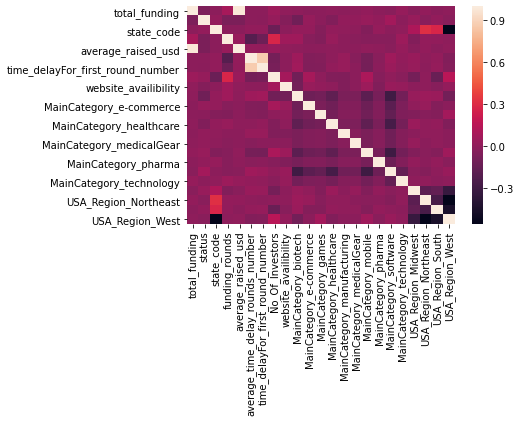

In [147]:
sns.heatmap(corr)

In [148]:
random.fit(x_rs,y_rs)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=45)

In [152]:
data.shape

(9623, 23)

In [157]:
fe=data.iloc[:,np.r_[0,2:23]]

In [158]:
feature_imp=pd.Series(random.feature_importances_, 
                      index=fe.columns).sort_values(ascending=False)

In [159]:
feature_imp

total_funding                       0.102087
average_raised_usd                  0.093450
MainCategory_software               0.081006
time_delayFor_first_round_number    0.072531
state_code                          0.070856
average_time_delay_rounds_number    0.069182
USA_Region_South                    0.059557
USA_Region_Northeast                0.052068
MainCategory_mobile                 0.049404
USA_Region_Midwest                  0.046546
No_Of_Investors                     0.044357
USA_Region_West                     0.037581
MainCategory_healthcare             0.037139
MainCategory_biotech                0.032814
funding_rounds                      0.031814
MainCategory_e-commerce             0.026162
MainCategory_technology             0.022418
MainCategory_pharma                 0.020640
MainCategory_games                  0.020353
MainCategory_medicalGear            0.013702
MainCategory_manufacturing          0.013121
website_availibility                0.003211
dtype: flo

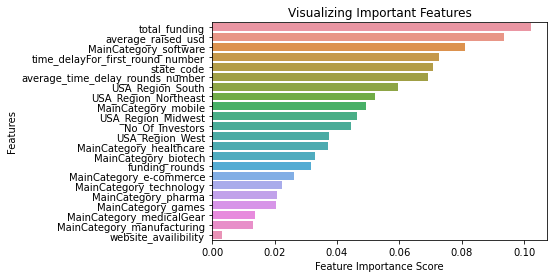

In [160]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()